# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [1109]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [1110]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [1113]:
df.dtypes

Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object

In [1114]:
df.isnull().sum()

Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [1116]:
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


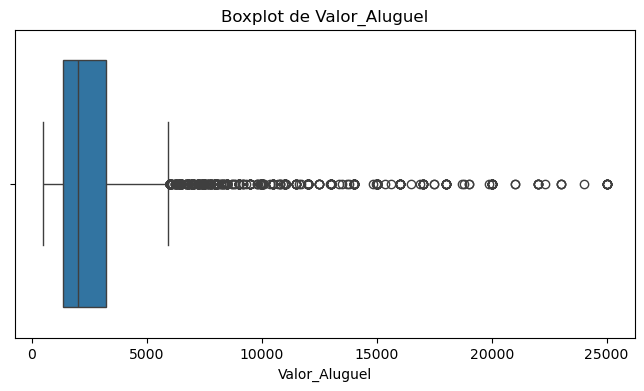

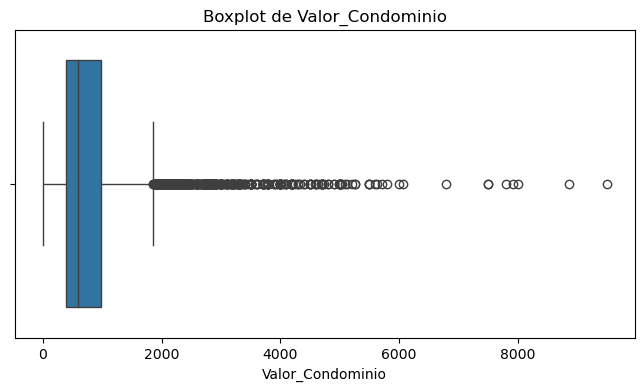

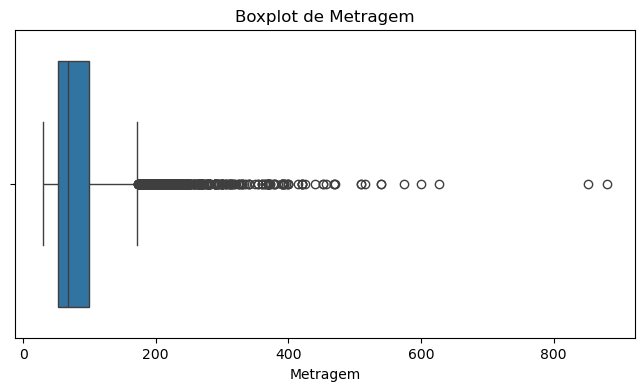

In [1117]:
colunas = ['Valor_Aluguel', 'Valor_Condominio', 'Metragem']

for col in colunas:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

In [1118]:
colunas = ['Valor_Aluguel', 'Valor_Condominio', 'Metragem']

for col in colunas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    print(f'{col} - Número de outliers: {outliers.shape[0]}')


Valor_Aluguel - Número de outliers: 749
Valor_Condominio - Número de outliers: 586
Metragem - Número de outliers: 647


In [1119]:
df[colunas] = df[colunas].astype(float)
colunas = ['Valor_Aluguel', 'Valor_Condominio', 'Metragem']

for col in colunas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df.loc[df[col] < limite_inferior, col] = limite_inferior
    df.loc[df[col] > limite_superior, col] = limite_superior

**Na análise das colunas Valor_Aluguel, Valor_Condominio e Metragem, encontrei valores muito fora do comum.
Para não perder muitos dados e evitar que esses valores extremos atrapalhem o modelo, preferi limitar esses valores aos limites definidos pelo IQR. Assim, mantive a maioria dos dados e deixei o modelo mais equilibrado.**

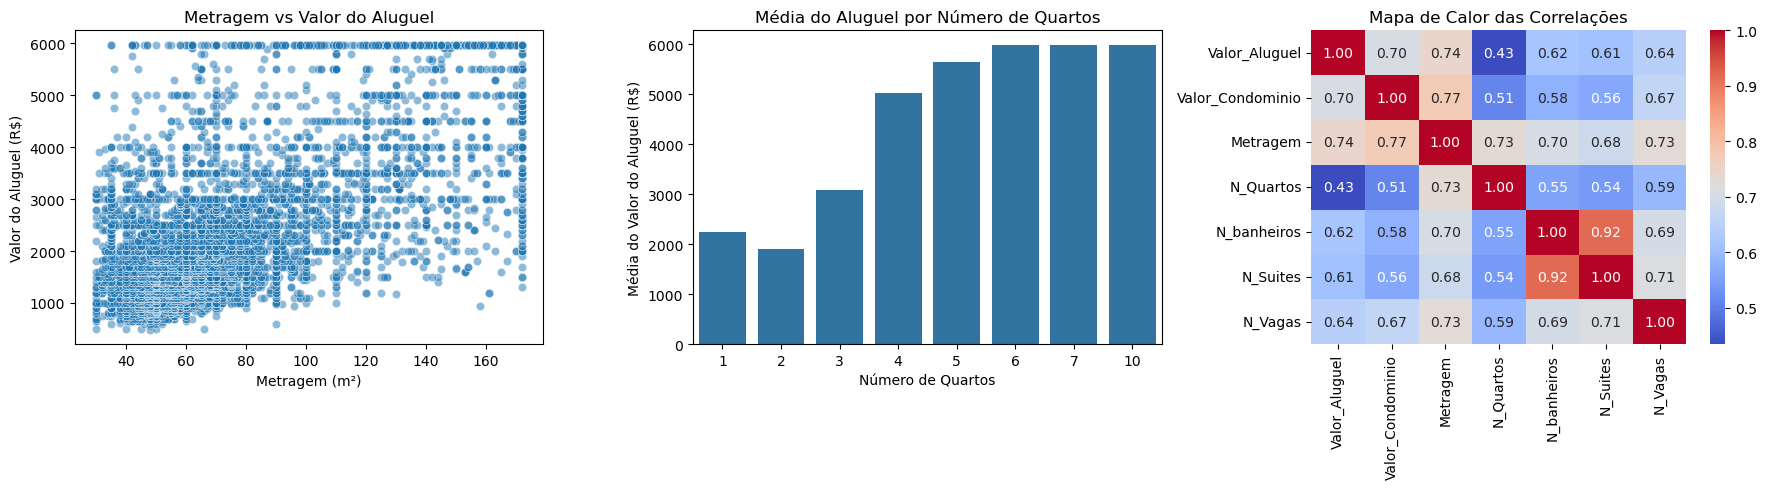

In [1121]:
plt.figure(figsize=(18, 5))

#Scatter plot: Metragem x Valor_Aluguel
plt.subplot(1, 3, 1)
sns.scatterplot(x='Metragem', y='Valor_Aluguel', data=df, alpha=0.5)
plt.title('Metragem vs Valor do Aluguel')
plt.xlabel('Metragem (m²)')
plt.ylabel('Valor do Aluguel (R$)')

#Gráfico de barras: Média do Valor_Aluguel por N_Quartos
plt.subplot(1, 3, 2)
mean_aluguel_quartos = df.groupby('N_Quartos')['Valor_Aluguel'].mean().reset_index()
sns.barplot(x='N_Quartos', y='Valor_Aluguel', data=mean_aluguel_quartos)
plt.title('Média do Aluguel por Número de Quartos')
plt.xlabel('Número de Quartos')
plt.ylabel('Média do Valor do Aluguel (R$)')

#Mapa de calor da correlação entre variáveis numéricas
plt.subplot(1, 3, 3)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor das Correlações')

plt.tight_layout()
plt.show()

**De um jeito geral, os dados mostram que quanto maior o imóvel — seja em metragem, número de vagas ou até no valor do condomínio — maior também tende a ser o valor do aluguel. Tudo indica que espaço e estrutura pesam bastante no preço.**

# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




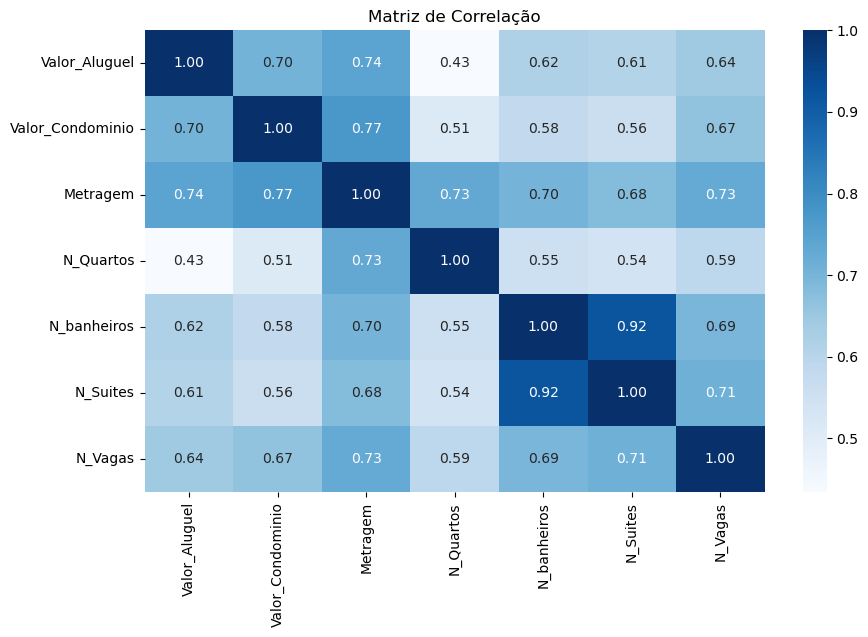

In [1124]:
correlacao = df.corr(numeric_only=True)

# Plot do heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlacao, annot=True, cmap='Blues', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

**As variáveis que apresentaram uma correlação mais forte com o Valor_Aluguel foram Metragem, Valor_Condominio e N_Vagas, indicando que elas têm maior potencial de influenciar diretamente o valor do aluguel e, por isso, são boas candidatas para o modelo.**

**PS: A matriz de correlação já havia sido explorada anteriormente, mas aqui ela é usada novamente para reforçar a escolha das variáveis que têm mais impacto no Valor_Aluguel, como Metragem, Valor_Condominio e N_Vagas, e lá foi pra tirar insights gerais sobre os dados.**


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [1127]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [1129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Treino:", X_train.shape, y_train.shape)
print("Teste:", X_test.shape, y_test.shape)

Treino: (5762, 6) (5762,)
Teste: (1441, 6) (1441,)


# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [1131]:
X = X_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)

In [1132]:
modelo_simples = LinearRegression()
modelo_simples.fit(X, y)

LinearRegression()

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [1134]:
intercepto = modelo_simples.intercept_
coeficiente = modelo_simples.coef_[0]

print(f"Intercepto (b0): {intercepto:.2f}")
print(f"Coeficiente (b1): {coeficiente:.2f}")

Intercepto (b0): 216.61
Coeficiente (b1): 28.36


Nossa equação seria: 
Valor_Aluguel estimado = 216,61 + (28,36 × Metragem) 

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [1137]:
r2_treino = modelo_simples.score(X, y)
print(f"R² no conjunto de treino: {r2_treino:.4f}")

R² no conjunto de treino: 0.5509


**O valor de R² no conjunto de treino foi de 0,5509, o que indica que o modelo consegue explicar cerca de 55% da variação no valor do aluguel com base apenas na metragem. Esse resultado é razoável, mostrando que a metragem tem uma influência importante no aluguel, mas outras variáveis também são necessárias para melhorar a previsão.**

D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

C:\Users\julia\AppData\Local\Temp\ipykernel_564\177618372.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = pd.DataFrame(np.linspace(X.min()[0], X.max()[0], 100), columns=['Metragem'])


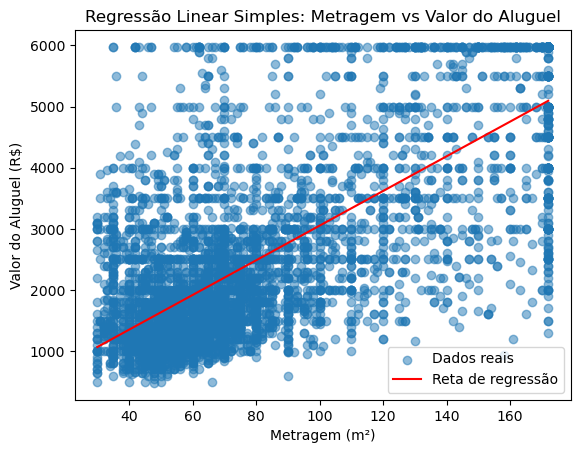

In [1140]:
import numpy as np

x_range = pd.DataFrame(np.linspace(X.min()[0], X.max()[0], 100), columns=['Metragem'])
y_pred = modelo_simples.predict(x_range)

plt.scatter(X, y, alpha=0.5, label='Dados reais')
plt.plot(x_range, y_pred, color='red', label='Reta de regressão')
plt.xlabel('Metragem (m²)')
plt.ylabel('Valor do Aluguel (R$)')
plt.title('Regressão Linear Simples: Metragem vs Valor do Aluguel')
plt.legend()
plt.show()

**Os pontos se espalham ao redor da reta, mostrando que a metragem tem influência no valor do aluguel, mas não explica tudo.
A reta mostra uma tendência clara de aumento do aluguel conforme a metragem cresce.
A dispersão dos pontos indica que existem outras variáveis que influenciam o preço além da metragem.
O ajuste é razoável, mas o modelo pode melhorar incluindo mais variáveis.**

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [1143]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [1144]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = modelo_simples.predict(X_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = modelo_simples.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)


Coeficiente de Determinação (R²) nos Dados de Teste: 0.5702561411987597


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

**O R² no treino foi 0,55 e no teste 0,57. Isso quer dizer que o modelo explica mais ou menos metade do preço do aluguel só com a metragem. Como os números são parecidos, o modelo está funcionando direitinho, sem erro grande. É um resultado bom para um modelo simples com só uma variável, mas ainda dá para melhorar incluindo outras informações.**

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

In [1149]:
from sklearn.model_selection import train_test_split

X = df.drop('Valor_Aluguel', axis=1)
y = df['Valor_Aluguel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1150]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5762, 6) (1441, 6) (5762,) (1441,)


B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [1152]:
modelo_multiplo = LinearRegression()
modelo_multiplo.fit(X_train, y_train)

LinearRegression()

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [1154]:
r2_treino_multiplo = modelo_multiplo.score(X_train, y_train)
print("R² no conjunto de treino:", r2_treino_multiplo)

R² no conjunto de treino: 0.6385128950699257


**O R² de 0.6385 indica que cerca de 64% da variação no preço dos imóveis pode ser explicada pelas variáveis usadas no modelo.
Esse resultado mostra que o modelo tem um bom desempenho para os dados de treino, capturando boa parte dos padrões, mas ainda há espaço para melhorias ou inclusão de outras variáveis que expliquem melhor o restante.**

D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [1157]:
previsoes_multipla = modelo_multiplo.predict(X_test)
r2_teste_multipla = modelo_multiplo.score(X_test, y_test)

print("R² no conjunto de teste:", r2_teste_multipla)

R² no conjunto de teste: 0.6485731750501595


E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

**O modelo de regressão múltipla apresentou um R² maior (cerca de 0,65) comparado ao modelo simples (cerca de 0,57). Isso indica que o modelo múltiplo explica melhor a variação do valor do aluguel, pois usa várias variáveis para prever o preço, enquanto o modelo simples considera apenas a metragem.
A diferença acontece porque o aluguel depende de vários fatores, como número de quartos, suítes, vagas e valor do condomínio, não só da metragem. Por isso, incluir mais variáveis no modelo ajuda a capturar melhor essa relação, tornando a previsão mais precisa.**